matplotlib是一套面向对象的绘图库， 它有三个层次：

* backend_bases.FigureCanvas:画布对象，绘图用的画布。
* backend_bases.Renderer: 渲染器对象，知道如何在 FigureCanvas 对象上绘图。
* artist.Artist: Artist对象，知道如何使用 Renderer在 FigureCanvas对象上绘图。

画布对象和渲染器对象是需要处理底层的绘图操作，例如在 wxPython 界面库所生成的界而上绘图，或者使用 PostScript 在PDF文件中绘图。Artist对象则处理所有的高层结构，例如处理图表、文字和曲线等各种绘图元素的绘制和布局。通常我们只和 Artist对象打交道，而不需要关心底层是如何实现绘图细节的。

Artist对象分为**简单类型**和**容器类型**两种。简单类型的Artist对象是标准的绘图元件， 例如Line2D（线）、Rectangle（矩形）、Text（文本）、Axeslmage等。而容器类型则可以包含多个 Artist对象，使它们组织成一个整体，例如 Axis、Axes、Figure等。

直接创建Artist对象进行绘图的流程如下：
1. 创建Figure对象；
2. 为Figure创建一个或多个Axes对象；
3. 调用Axes对象的方法来创建各种简单类型的Artist对象。

**Figure.add_axes()**:用于创建Axes对象。add_axes（）的参数是一个形如[left， bottom， width，height]的列表， 这些数值分别指定所创建的Axes对象在Figure对象中的位置和大小，各个值的取值范围都在0 到 1 之间。

True


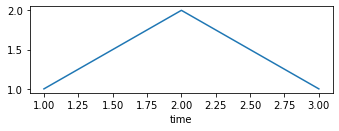

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure() #创建Figure对象
ax = fig.add_axes([0.15,0.1,0.7,0.3]) # 通过调用Figure对象的add_axes()方法创建一个Axes对象。
ax.set_xlabel("time")# 调用Axes对象的set_xlabel()方法设置x轴坐标标题
              
line = ax.plot([1,2,3],[1,2,1])[0] #ax.plot()返回只有一个元素的列表，这里取其中的line2D对象。
print(line is ax.lines[0]) # 创建的Line2D元素在A xes对象的line2D对象列表中

Axes对象还包括许多其他的Artists对象，例如可以通过set_xlabel()设置其X轴上的标题。

Axes对象的lines属性是一个包含所有曲线的列表，如果继续运行ax.plot(), 所创建的 Line2D对象都会添加到此列表中。如果想删除某条曲线， 直接从此列表中删除即可。

### 以标题为例的对象

如果查看set_xlabel()的源代码， 就会发现它是通过下面的语句实现的：

**self.xaxis.set_label_text(xlabel)**

如果一直跟踪下去， 就会发现Axes对象的xaxis属性是一个XAxis对象，其label属性是一个Text对象，而 Text对象的_text属性为我们设置的值：

In [3]:
print(ax.xaxis)
print(ax.xaxis.label)
print(ax.xaxis.label._text)

XAxis(64.8,28.8)
Text(0.5, 17.200000000000003, 'time')
time


Axes、XAxis和Text类都从Artist继承， 也可以调用它们的**get_\*()**以获得相应的属性值：

In [4]:
ax.get_xaxis().get_label().get_text()

'time'

## 1、 Artist的属性

图表中的每个绘图元素都用一个Artist对象表示， 而每个Artist对象都有许多属性控制其显示效果。例如 Figure对象和 Axes对象都有patch属性作为其背景，它是一个Rectangle对象。通过设置它的属性可以修改图表的背景色或透明度， 下面的例子将图表的背景色设置为绿色：

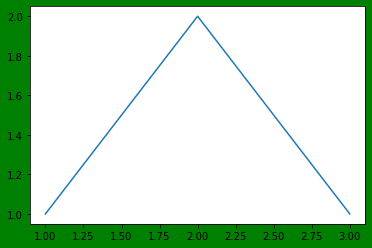

In [5]:
fig = plt.figure()
fig.patch.set_color("g")
plt.plot([1,2,3],[1,2,1])[0]

**注意：注意当代码作为单独程序运行时，调用set_color()设置好背景色之后，并不会立即在界面上显示出来，还需要调用 fig.canvas.draw（）才能更新界面显示。**

![Artist对象1](.\Artist对象1.PNG)

Artist对象的所有属性都可以通过相应的**get_\*()**和**set_\*()**方法进行读写， 例如下面的语句将新绘制的曲线对象的alpha属性设置0. 2, 使它变成半透明：

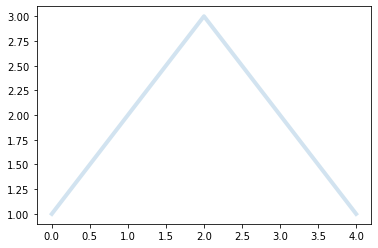

In [6]:
line = plt.plot([1, 2, 3, 2, 1],  lw=4)[0]
line.set_alpha(0.2)

[None, None]

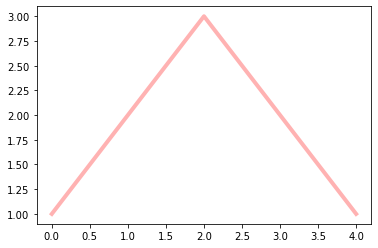

In [7]:
line = plt.plot([1, 2, 3, 2, 1],  lw=4)[0]
line.set(alpha=0.3, color='r') #使用set（）设置多个属性

使用**getp（）**可以方便的输出Artist对象所有的属性和与之对应的值。

In [8]:
plt.getp(line)

    agg_filter = None
    alpha = 0.3
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = r
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0., 1., 2., 3., 4.]), array([1, 2, 3, 2, 1...
    drawstyle or ds = default
    figure = Figure(432x288)
    fillstyle = full
    gid = None
    in_layout = True
    label = _line0
    linestyle or ls = -
    linewidth or lw = 4.0
    marker = None
    markeredgecolor or mec = r
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = r
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[0., 1.],        [1., 2.],        [2.,...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = None
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    solid_joinstyle = ro

## 2、 Figure的属性

在构成图表的各种Artist对象中，最上层的Artist对象是Figure, 它包含组成图表的所有元素。当调用add_subplot()或add_axes()方法往图表中添加子图吋，这些子图都将添加到axes属性列表中,同时这两个方法也返回新创建的Axes对象。注意add_subplot()和add_axes()所返回对象的类型有所不同， 分別为 AxesSubplot类型和Axes类型，AxesSubplot是Axes的派生类。

True
True


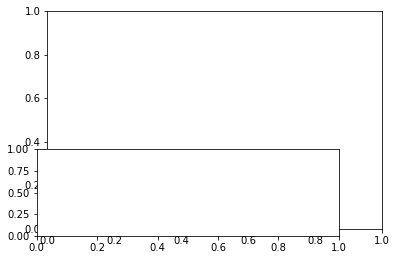

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = fig.add_axes([0.1,0.1,0.7,0.3])

print(ax1 in fig.axes)
print(ax2 in fig.axes)

为了支持**gca()**等函数， Figure对象内部保存有当前轴的信息， 因此不建议立接对axes属性进行列表操作， 而应该使用 add_subplot()、add_axes()、delaxes()等方法进行子图的添加和删除操作。但是使用for循环对axes属性中的每个元素进行操作是没有问题的。

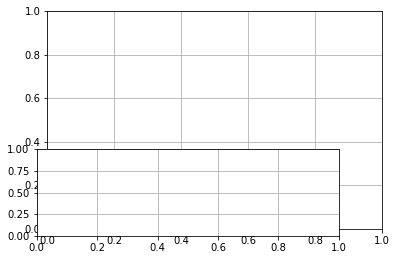

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = fig.add_axes([0.1,0.1,0.7,0.3])

for ax in fig.axes:
    ax.grid(True) #网格属性

Figure对象可以拥有自己的文字、线条以及图像等简单类型的Artist对象。默认的坐标系统以像素点为单位，但是可以通过设置Artist对象的transform属性修改其所使用的坐标系。

**transform:**  修改其所使用的坐标系,如 Figure对象 的坐标系是以图表的左下角为坐标原点(0,0), 右上角的坐标为(1，1)。

[<matplotlib.lines.Line2D object at 0x000000001DDFD3A0>, <matplotlib.lines.Line2D object at 0x000000001DE1C1C0>]


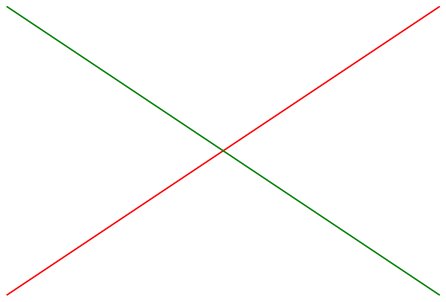

In [11]:
from matplotlib.lines import Line2D
fig = plt.figure()

linel = Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig, color="r") #创建Line2D对象line1。
line2 = Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig, color="g") #创建Line2D对象line2。
fig.lines.extend([linel, line2]) #在fig对象的线属性中添加Line2D对象列表。
print(fig.lines)

为了让所创建的Line2D对象使用Figure对象的坐标系，需要以下步骤：
1. 将 Figure对象的 transFigure属性赋给 Line2D 对象的 transform属性。
2. 为了让 Line2D 对象知道它是在Figure对象中，还设置其figure属性为 fig。
3. 最后还需要将这两个Line2D 对象添加到 Figure对象的 lines属性列表中。

![Artist对象2.PNG](.\Artist对象2.PNG)

## 3.Axes 子图容器

Axes 容器(子图)是整个matplotlib的核心， 它包含了组成图表的众多Artist对象，并且有许多方法函数帮助我们创建和修改这些对象。

和Figure容器一样，Axes对象有一个patch属性作为背景，当它是笛卡尔坐标时，patch属性是一个Rectangle对象;而当它是极坐标时，patch属性则是 Circle对象。

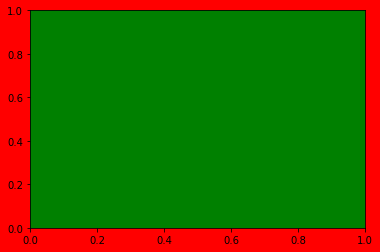

In [12]:
fig = plt.figure()
fig.patch.set_color("r")
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")

### ax.plot()

当调用 Axes对象的绘图方法plot()时， 它将创建一组Line2D对象， 并将它们添加进Axes对象的lines属性中，最后返回包含所有创建的 Line2D对象的列表。

True
[]


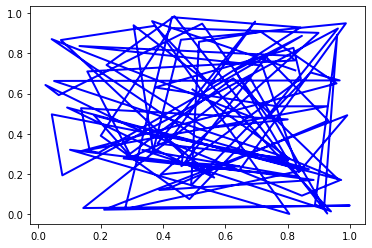

In [13]:
import numpy as np

x, y = np.random.rand(2, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
line = ax.plot(x, y, color="blue", linewidth=2)[0]

print(line is ax.lines[0])
print(fig.lines)
print(ax.lines)

### ax.hist()    ax.bar()

与 plot()类似，绘制柱状图的函数bar()和绘制直方统计图的函数hist()将创建一个Patch对象的列表，每个元素实际上都是从Patch类派生的Rectangle对象， 所创建的 Patch对象都被添加进了 Axes对象的 patches属性中。

True
[<matplotlib.patches.Rectangle object at 0x000000001DEEB640>, <matplotlib.patches.Rectangle object at 0x000000001DEEB460>, <matplotlib.patches.Rectangle object at 0x000000001DEEBB20>, <matplotlib.patches.Rectangle object at 0x000000001DEEBDF0>, <matplotlib.patches.Rectangle object at 0x000000001DEF8100>]


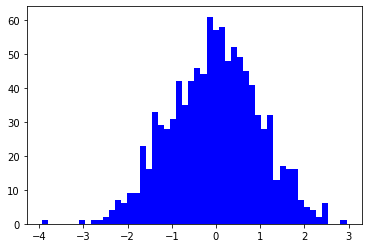

In [14]:
fig, ax = plt.subplots()
n, bins, rects = ax.hist(np.random.randn(1000),50, facecolor="blue")
print(rects[0] is ax.patches[0])
print(ax.patches[:5])

###  add_line() or add_patch()

一般不会直接对lines或 patches属性进行操作，而是调用 add_line()或 add_patch()等方法， 这些方法完成许多属性的设置工作。以下为操作步骤：

**1. 首先创建Axes对象ax 和Rectangle对象rect；**

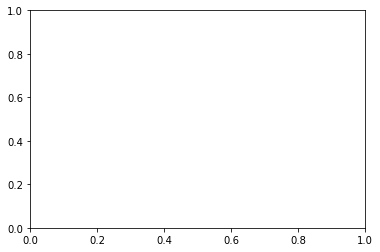

In [15]:
fig, ax = plt.subplots()
rect = plt.Rectangle((1,1), width=5, height=12)

**2. 通过add_patch（）将rect添加进ax中；**

In [16]:
ax.add_patch(rect)

**3. 为了完整显示rect，调用ax的autoscale_view（）方法让它动调节X-Y轴的显示范围：**

In [17]:
print(ax.get_xlim()) # a x 的X 轴范围为0 到 1 , 无法显示完整的rect
print(ax.dataLim.bounds) # 数据的范围和 rect 的大小一致
ax.autoscale_view() # 自动调整坐标轴的范围
print(ax.get_xlim()) # 于是X轴可以完整显示rect

(0.0, 1.0)
(1.0, 1.0, 5.0, 12.0)
(0.75, 6.25)


下表列出了Axes对象中可以包含其他Artist对象的属性：

![Artist对象3](.\Artist对象3.PNG)
![Artist对象4](.\Artist对象4.PNG)

下表列出了Axes对象的各种创建其他Artist对象的方法：

![Artist对象5](.\Artist对象5.PNG)

下面程序调用 scatter（）绘制散点图， 它返回的是一个 PathCollection对象， 该对象被添加进 ax.collections列表：

<matplotlib.collections.PathCollection object at 0x000000001E00BCD0> True


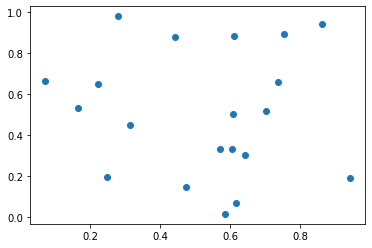

In [18]:
fig, ax = plt.subplots()
t = ax.scatter(np.random.rand(20), np.random.rand(20))
print(t,t in ax.collections)

## 4.Axis坐标轴容器

Axis 容器包括坐标轴上的刻度线、刻度文本、坐标网格以及坐标轴标题等内容。

**get_major_ticks()**：获得主刻度线。每个刻度线都是一个XTick或YTick对象，它包括实际的刻度线和刻度文本。

**get_minor_ticks()**: 获得副刻度线。每个刻度线都是一个XTick或YTick对象，它包括实际的刻度线和刻度文本。

**get_ticklocs()**：获得刻度位置的列表。

**get_ticklabels()**: 获得刻度文本。返回一个刻度文本对象Text major ticklabel 列表；

**get_ticklines()**: 获得刻度线。返回一个刻度线对象Line2D ticklines 列表，默认返回子图中两个X轴或两个Y轴所有刻度线。可通过定义参数minor = True或False，分别获得副刻度线或主刻度线。

[0.  0.2 0.4 0.6 0.8 1. ]
<a list of 6 Text major ticklabel objects>
['', '', '', '', '', '']
<a list of 12 Line2D ticklines objects>
<a list of 0 Line2D ticklines objects>


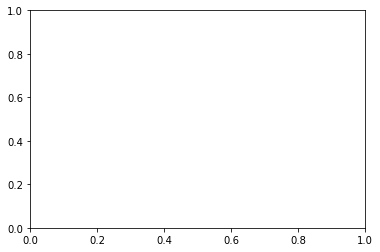

In [19]:
fig,  ax = plt.subplots()
axis = ax.xaxis # 获得x轴

print(axis.get_ticklocs()) # 获得x轴的刻度位置。

print(axis.get_ticklabels()) # 获得x轴的刻度标签
print([x.get_text() for x in axis.get_ticklabels()]) #获得刻度标签的文本

print(axis.get_ticklines()) # 获得x轴刻度线，可以看到共12条刻度线，它们是子图中上下两个X轴的所有刻度线。
print(axis.get_ticklines(minor = True)) #获得X轴副刻度线列表，列表显示无对象表示子图X轴无副刻度线。

副刻度线列表为空是因为用于计算副刻度位置的对象默认为NullLocator , 它不产生任何刻度线。而计算主刻度位置的对象为AutoLocator , 它会根据当前的缩放等配置自动计算刻度的位置。

In [20]:
print(axis.get_minor_locator()) # 计算副刻度位置的对象,对象为BullLocation，不产生任何刻度线
print(type(axis.get_minor_locator()))
print(axis.get_major_locator()) # 计算主刻度位置的对象，对象为AutoLocation，会根据当前的缩放配置自动计算刻度位置

<class 'matplotlib.ticker.NullLocator'>


### 刻度样式设置

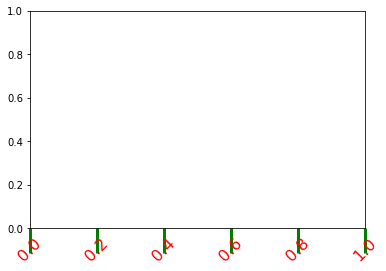

In [21]:
for label in axis.get_ticklabels():  #设置刻度标签
    label.set_color("red")
    label.set_rotation(45)
    label.set_fontsize(16)

for line in axis.get_ticklines(): #设置刻度线
    line.set_color("green")
    line.set_markersize(25)
    line.set_markeredgewidth(3)

fig

上面对刻度线和刻度文本属性的设置是通过对Artist对象的属性设置实现的，这是因为刻度线和刻度文本都是Artist对象，在pyplot模块中有更快设置刻度文本的方法：**plt.xticks（）**，不过这个方法只能实现对刻度标签的设置，无法设置刻度线属性。

**plt.xticks(fontsize=16, color="red", retation=45)**

### 刻度设置实例

matplotlib 提供了多种配置刻度线位置的 Locator 类和控制刻度文本显示的 Formatter 类。下面的程序设置X 轴的主刻度为$\pi/4$, 副刻度为$\pi/20$ , 并且主刻度上的文本用数学符号显示$\pi$。

在matplotlib.ticker模块中定义了刻度定位和文本格式化相关的类MultipleLocator 和FuncFormatter 。

* **MultipleLocator:** 以指定值的整数倍为刻度放置主副刻度线。

* **FuncFormatter**: 使用指定的函数计算刻度文本，它会将刻度值和刻度的序号作为参数传递给计算刻度文本的闲数。程序中通过 pi_formatter()计算出与刻度值对应的刻度文本。

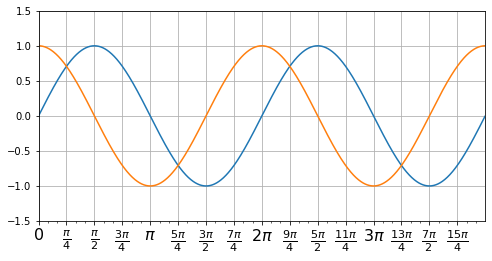

In [22]:
from fractions import Fraction #加载fraction类，用以处理分数类型
from matplotlib.ticker import MultipleLocator, FuncFormatter # 加载刻度定位类MultipleLocation 和文本格式化类FuncFormatter

x = np.arange(0, 4*np.pi, 0.01)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(x,np.sin(x),x,np.cos(x))

def pi_formatter(x,pos):
    frac = Fraction(int(np.round(x/(np.pi/4))),4)
    n, d = frac.numerator, frac.denominator
    if frac == 0:
        return '0'
    elif frac ==1:
        return "$\pi$"
    elif d==1:
        return r"${%d}\pi$" % n
    elif  n==1:
        return r"$\frac{\pi}{%d}$" % d #分数显示刻度标签，\frac：将后面表达式分数化，前面一个{}内显示分子，后面一个显示分母。
    return r"$\frac{%d \pi}{%d}$" % (n,d)

#设置坐标轴范围
plt.xlim(0,np.max(x))
plt.ylim(-1.5,1.5)

#设置图的底边距
plt.subplots_adjust(bottom= 0.15)

#开启网格
plt.grid()

#设置x轴主刻度为pi/4
ax.xaxis.set_major_locator(MultipleLocator(np.pi/4))

#设置x轴副刻度为pi/12
ax.xaxis.set_minor_locator(MultipleLocator(np.pi/12))

#设置主刻度文本用pi_formatter函数表示
ax.xaxis.set_major_formatter(FuncFormatter(pi_formatter))

#设置刻度文本大小
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

## 5. Artist对象之间的关系



NameError: name 'clf' is not defined

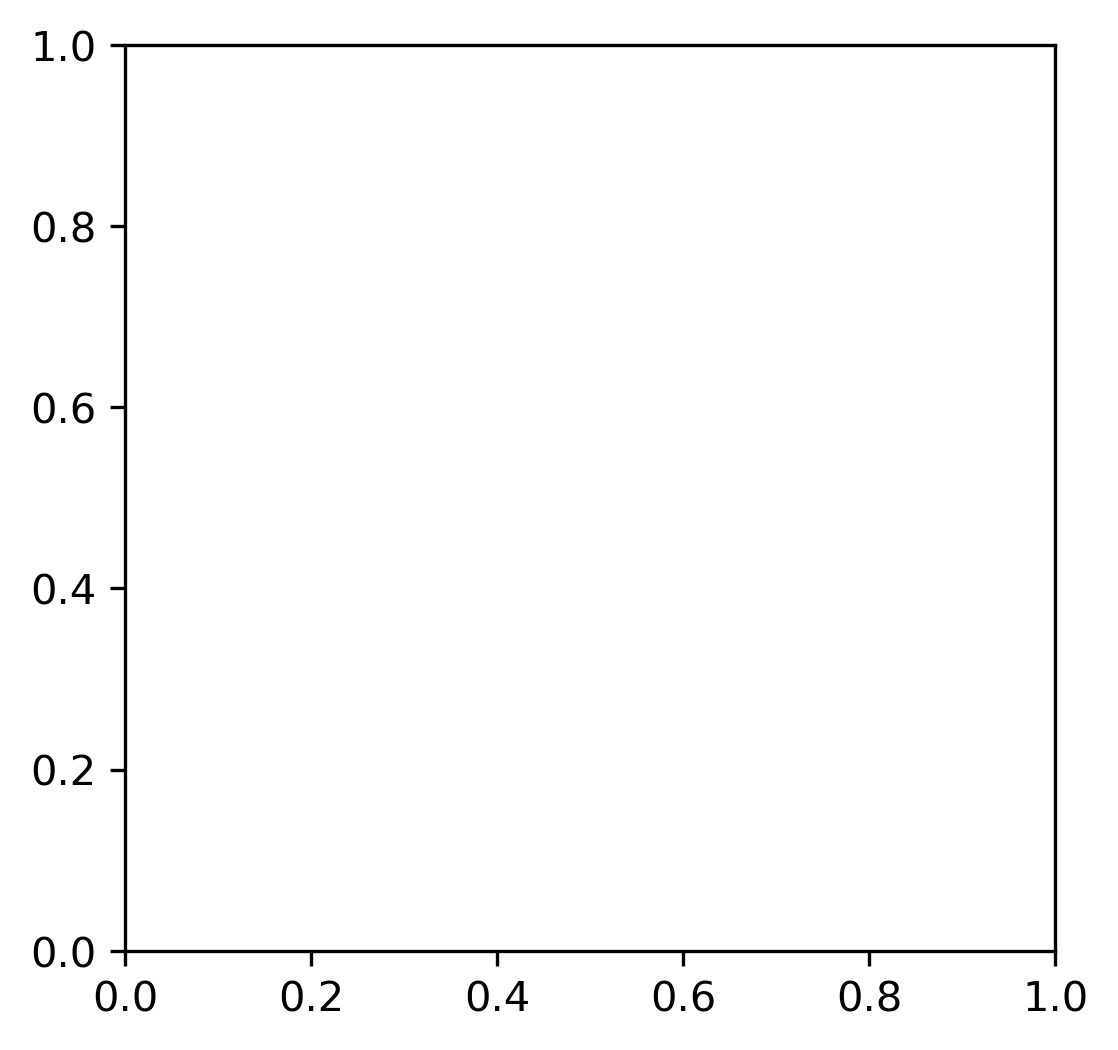

In [23]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')